<a href="https://colab.research.google.com/github/giakhangle/mayhoc/blob/main/tuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thực hành 3 - Bayes

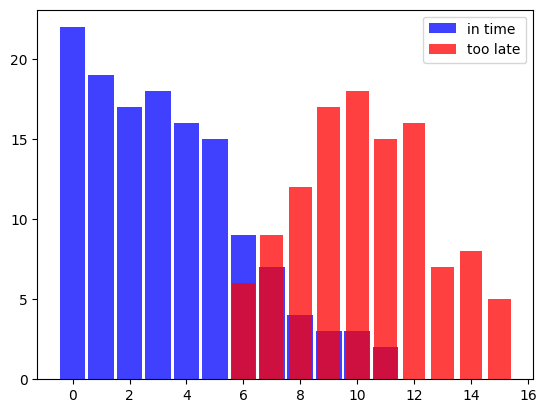

In [ ]:
import math
in_time = [(0, 22), (1, 19), (2, 17), (3, 18),
          (4, 16), (5, 15), (6, 9), (7, 7),
          (8, 4), (9, 3), (10, 3), (11, 2)]
too_late = [(6, 6), (7, 9), (8, 12), (9, 17),
            (10, 18), (11, 15), (12,16), (13, 7),
            (14, 8), (15, 5)]
import matplotlib.pyplot as plt
X, Y = zip(*in_time)
X2, Y2 = zip(*too_late)
bar_width = 0.9
plt.bar(X, Y, bar_width, color="blue", alpha=0.75, label="in time")
bar_width = 0.8
plt.bar(X2, Y2, bar_width, color="red", alpha=0.75, label="too late")
plt.legend(loc='upper right')
plt.show()
in_time_dict = dict(in_time)
too_late_dict = dict(too_late)
def catch_the_train(min):
  s = in_time_dict.get(min, 0)
  if s == 0:
    return 0
  else:
    m = too_late_dict.get(min, 0)
    return s / (s + m)
  for minutes in range(-1, 13):
    print(minutes, catch_the_train(minutes))

Thực hành 4 - Bayes

female:
['Stephanie', 'Cynthia', 'Katherine', 'Elizabeth', 'Carol', 'Christina', 'Beverly', 'Sharon', 'Denise', 'Rebecca']
[149 174 183 138 145 161 179 162 148 196]
male:
['Randy', 'Jessie', 'David', 'Stephen', 'Jerry', 'Billy', 'Earl', 'Todd', 'Martin', 'Kenneth']
[184 175 187 192 204 180 184 174 177 200]
male {155: 1, 160: 5, 165: 4, 170: 6, 175: 7, 180: 5, 185: 8, 190: 8, 195: 2, 200: 3}
female {130: 1, 135: 1, 140: 0, 145: 3, 150: 5, 155: 7, 160: 8, 165: 11, 170: 7, 175: 2, 180: 4, 185: 0}


<ipython-input-17-ec68a172b0c8>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  heights[gender] = np.array(heights[gender], np.int)


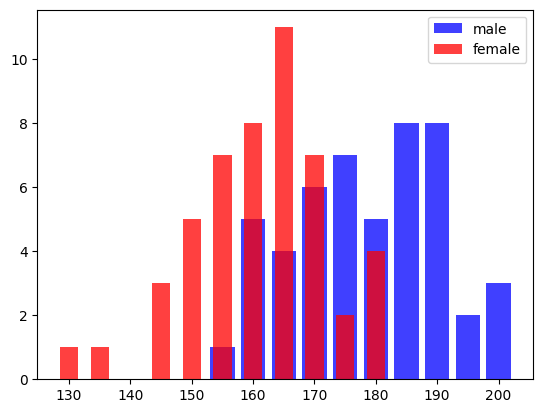

130 [(0.0, 'male'), (1.0, 'female')]
135 [(0.0, 'male'), (1.0, 'female')]
140 [(0.5, 'male'), (0.5, 'female')]
145 [(0.0, 'male'), (1.0, 'female')]
150 [(0.0, 'male'), (1.0, 'female')]
155 [(0.125, 'male'), (0.875, 'female')]
160 [(0.3846153846153847, 'male'), (0.6153846153846154, 'female')]
165 [(0.26666666666666666, 'male'), (0.7333333333333333, 'female')]
170 [(0.4615384615384616, 'male'), (0.5384615384615385, 'female')]
175 [(0.7777777777777778, 'male'), (0.22222222222222224, 'female')]
180 [(0.5555555555555556, 'male'), (0.4444444444444445, 'female')]
185 [(1.0, 'male'), (0.0, 'female')]
190 [(1.0, 'male'), (0.0, 'female')]
195 [(1.0, 'male'), (0.0, 'female')]
200 [(1.0, 'male'), (0.0, 'female')]
205 [(0.5, 'male'), (0.5, 'female')]
210 [(0.5, 'male'), (0.5, 'female')]
215 [(0.5, 'male'), (0.5, 'female')]


In [17]:
import numpy as np
genders = ["male", "female"]
persons = []
with open("/content/chieucao_cannang.txt") as fh:
  for line in fh:
    persons.append(line.strip().split())
firstnames = {}
heights = {}
for gender in genders:
  firstnames[gender] = [ x[0] for x in persons if x[4]==gender]
  heights[gender] = [ x[2] for x in persons if x[4]==gender]
  heights[gender] = np.array(heights[gender], np.int)
for gender in ("female", "male"):
  print(gender + ":")
  print(firstnames[gender][:10])
  print(heights[gender][:10])
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
class Feature:
  def __init__(self, data, name=None, bin_width=None):
    self.name = name
    self.bin_width = bin_width
    if bin_width:
      self.min, self.max = min(data), max(data)
      bins = np.arange((self.min // bin_width) * bin_width,
                      (self.max // bin_width) * bin_width,bin_width)
      freq, bins = np.histogram(data, bins)
      self.freq_dict = dict(zip(bins, freq))
      self.freq_sum = sum(freq)
    else:
      self.freq_dict = dict(Counter(data))
      self.freq_sum = sum(self.freq_dict.values())
  def frequency(self, value):
    if self.bin_width:
      value = (value // self.bin_width) * self.bin_width
    if value in self.freq_dict:
      return self.freq_dict[value]
    else:
      return 0
fts = {}
for gender in genders:
  fts[gender] = Feature(heights[gender], name=gender, bin_width=5)
  print(gender, fts[gender].freq_dict)
for gender in genders:
  frequencies = list(fts[gender].freq_dict.items())
  frequencies.sort(key=lambda x: x[1])
  X, Y = zip(*frequencies)
  color = "blue" if gender=="male" else "red"
  bar_width = 4 if gender=="male" else 3
  plt.bar(X, Y, bar_width, color=color, alpha=0.75, label=gender)
plt.legend(loc='upper right')
plt.show()
class NBclass:
  def __init__(self, name, *features):
    self.features = features
    self.name = name
  def probability_value_given_feature(self, feature_value, feature):
    if feature.freq_sum == 0:
      return 0
    else:
      return feature.frequency(feature_value) / feature.freq_sum
cls = {}
for gender in genders:
  cls[gender] = NBclass(gender, fts[gender])
class Classifier:
  def __init__(self, *nbclasses):
    self.nbclasses = nbclasses
  def prob(self, *d, best_only=True):
    nbclasses = self.nbclasses
    probability_list = []
    for nbclass in nbclasses:
      ftrs = nbclass.features
      prob = 1
      for i in range(len(ftrs)):
        prob *= nbclass.probability_value_given_feature(d[i], ftrs[i])
      probability_list.append( (prob, nbclass.name) )
    prob_values = [f[0] for f in probability_list]
    prob_sum = sum(prob_values)
    if prob_sum==0:
      number_classes = len(self.nbclasses)
      pl = []
      for prob_element in probability_list:
        pl.append( ((1 / number_classes), prob_element[1]))
      probability_list = pl
    else:
      probability_list = [ (p[0] / prob_sum, p[1]) for p in probability_list]
    if best_only:
      return max(probability_list)
    else:
      return probability_list
c = Classifier(cls["male"], cls["female"])
for i in range(130, 220, 5):
  print(i, c.prob(i, best_only=False))

Thực hành 5 - Bayes

In [21]:
import numpy as np
def prepare_person_dataset(fname):
  genders = ["male", "female"]
  persons = []
  with open(fname) as fh:
    for line in fh:
      persons.append(line.strip().split())
  firstnames = []
  dataset = [] # weight and height
  for person in persons:
    firstnames.append( (person[0], person[4]) )
    height_weight = (float(person[2]), float(person[3]))
    dataset.append( (height_weight, person[4]))
  return dataset
learnset = prepare_person_dataset("/content/chieucao_cannang.txt")
print(learnset)

[((184.0, 73.0), 'male'), ((149.0, 52.0), 'female'), ((174.0, 63.0), 'female'), ((175.0, 67.0), 'male'), ((183.0, 81.0), 'female'), ((187.0, 60.0), 'male'), ((192.0, 96.0), 'male'), ((204.0, 91.0), 'male'), ((180.0, 66.0), 'male'), ((184.0, 52.0), 'male'), ((174.0, 53.0), 'male'), ((177.0, 91.0), 'male'), ((138.0, 37.0), 'female'), ((200.0, 82.0), 'male'), ((193.0, 79.0), 'male'), ((189.0, 79.0), 'male'), ((145.0, 59.0), 'female'), ((188.0, 53.0), 'male'), ((187.0, 81.0), 'male'), ((187.0, 99.0), 'male'), ((190.0, 81.0), 'male'), ((161.0, 48.0), 'female'), ((179.0, 75.0), 'female'), ((180.0, 67.0), 'male'), ((155.0, 48.0), 'male'), ((201.0, 122.0), 'male'), ((162.0, 62.0), 'female'), ((148.0, 49.0), 'female'), ((171.0, 50.0), 'male'), ((196.0, 86.0), 'female'), ((163.0, 46.0), 'female'), ((159.0, 37.0), 'female'), ((163.0, 53.0), 'male'), ((150.0, 39.0), 'female'), ((170.0, 56.0), 'female'), ((191.0, 55.0), 'male'), ((175.0, 37.0), 'male'), ((169.0, 78.0), 'female'), ((167.0, 59.0), 'f

Thực hành 1 - Dicision Tree

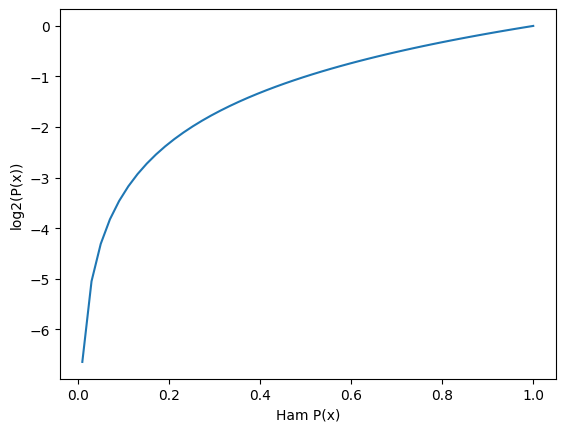

In [18]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(np.linspace(0.01,1),np.log2(np.linspace(0.01,1)))
ax.set_xlabel("Ham P(x)")
ax.set_ylabel("log2(P(x))")
plt.show()

Thực hành 2 - Dicision Tree

In [ ]:
import numpy as np
def gini_index(groups, classes):
  n_instances = float(sum([len(group) for group in groups]))
  gini = 0.0
  for group in groups:
    size = float(len(group))
    if size == 0:
      continue
    score = 0.0
    for class_val in classes:
      p = [row[-1] for row in group].count(class_val) / size
      score += p * p
    gini += (1.0 - score) * (size / n_instances)
  return gini
print(gini_index([[[1, 1], [1, 0]], [[1, 1], [1, 0]]], [0, 1]))
print(gini_index([[[1, 0], [1, 0]], [[1, 1], [1, 1]]], [0, 1]))

0.5
0.0
